<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Getting-the-Data" data-toc-modified-id="Getting-the-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Getting the Data</a></span></li></ul></li><li><span><a href="#Part-A" data-toc-modified-id="Part-A-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part A</a></span><ul class="toc-item"><li><span><a href="#Linear-Hidden-Units" data-toc-modified-id="Linear-Hidden-Units-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear Hidden Units</a></span><ul class="toc-item"><li><span><a href="#Model-Definition" data-toc-modified-id="Model-Definition-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Model Definition</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Evaluating-Results" data-toc-modified-id="Evaluating-Results-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Evaluating Results</a></span></li></ul></li><li><span><a href="#GRU-Units" data-toc-modified-id="GRU-Units-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>GRU Units</a></span><ul class="toc-item"><li><span><a href="#Model-Definition" data-toc-modified-id="Model-Definition-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Model Definition</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Evaluating-Results" data-toc-modified-id="Evaluating-Results-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Evaluating Results</a></span></li></ul></li><li><span><a href="#LSTM-Units" data-toc-modified-id="LSTM-Units-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LSTM Units</a></span><ul class="toc-item"><li><span><a href="#Model-Definition" data-toc-modified-id="Model-Definition-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Model Definition</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Evaluating-Results" data-toc-modified-id="Evaluating-Results-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Evaluating Results</a></span></li></ul></li><li><span><a href="#Comparing-Types-of-Units" data-toc-modified-id="Comparing-Types-of-Units-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Comparing Types of Units</a></span></li></ul></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Discussion</a></span></li></ul></div>

# Question 1

## Imports

In [0]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import random
import unicodedata
import string
import math
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

## Getting the Data

In [3]:
!wget https://download.pytorch.org/tutorial/data.zip
!unzip data.zip

--2019-07-27 14:01:52--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.225.166.83, 13.225.166.79, 13.225.166.66, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.225.166.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.05s   

2019-07-27 14:01:58 (60.7 MB/s) - ‘data.zip’ saved [2882130/2882130]

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/It

In [0]:
class DataLoader: 
    
    def __init__(self):
        
        all_letters = string.ascii_letters + " .,;'"
        n_letters = len(all_letters)
        self.n_letters = n_letters
        self.all_letters = all_letters
        
        # Build the category_lines dictionary, a list of names per language
        category_lines = {}
        train_data = {}
        test_data = {}
        all_categories = []
        
        for filename in self.findFiles('data/names/*.txt'):
            category = os.path.splitext(os.path.basename(filename))[0]
            all_categories.append(category)
            lines = self.readLines(filename)
            random.shuffle(lines)
            train_data[category] = lines[0:int(math.floor(0.8*len(lines)))]
            test_data[category] = lines[int(math.floor(0.8*len(lines)))+1:]
            category_lines[category] = lines

        n_categories = len(all_categories)
        
        self.n_categories = n_categories
        self.train_data = train_data
        self.test_data = test_data
        self.all_categories = all_categories

            
    def findFiles(self, path):
        return glob.glob(path)
    
    # Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
    def unicodeToAscii(self, s):
        return ''.join(
            c for c in unicodedata.normalize('NFD', s)
            if unicodedata.category(c) != 'Mn'
            and c in self.all_letters
        )

    # Read a file and split into lines
    def readLines(self, filename):
        lines = open(filename, encoding='utf-8').read().strip().split('\n')
        return [self.unicodeToAscii(line) for line in lines]

    def categoryFromOutput(self, output):
        top_n, top_i = output.topk(1)
        category_i = top_i[0].item()
        return self.all_categories[category_i], category_i

    def randomChoice(self, l):
        return l[random.randint(0, len(l) - 1)]

    def randomTrainingExample(self):
        category = self.randomChoice(self.all_categories)
        line = self.randomChoice(self.train_data[category])
        category_tensor = torch.tensor([self.all_categories.index(category)], dtype=torch.long)
        line_tensor = self.lineToTensor(line)
        return category, line, category_tensor, line_tensor
    
    def randomTrainingExample2(self):
        category, line = self.randomTrainingPair()
        category_tensor = self.categoryTensor(category)
        input_line_tensor = self.inputTensor(line)
        target_line_tensor = self.targetTensor(line)
        return category_tensor, input_line_tensor, target_line_tensor
    
    def randomTrainingPair(self):
        category = self.randomChoice(self.all_categories)
        line = self.randomChoice(self.train_data[category])
        return category, line    
    
    # Find letter index from all_letters, e.g. "a" = 0
    def letterToIndex(self, letter):
        return self.all_letters.find(letter)

    # Just for demonstration, turn a letter into a <1 x n_letters> Tensor
    def letterToTensor(self, letter):
        tensor = torch.zeros(1, self.n_letters)
        tensor[0][self.letterToIndex(letter)] = 1
        return tensor

    # Turn a line into a <line_length x 1 x n_letters>,
    # or an array of one-hot letter vectors
    def lineToTensor(self, line):
        tensor = torch.zeros(len(line), 1, self.n_letters)
        for li, letter in enumerate(line):
            tensor[li][0][self.letterToIndex(letter)] = 1
        return tensor
    
    # One-hot vector for category
    def categoryTensor(self, category):
        li = self.all_categories.index(category)
        tensor = torch.zeros(1, self.n_categories)
        tensor[0][li] = 1
        return tensor

    # One-hot matrix of first to last letters (not including EOS) for input
    def inputTensor(self, line):
        tensor = torch.zeros(len(line), 1, self.n_letters)
        for li in range(len(line)):
            letter = line[li]
            tensor[li][0][self.all_letters.find(letter)] = 1
        return tensor

    # LongTensor of second letter to end (EOS) for target
    def targetTensor(self, line):
        letter_indexes = [self.all_letters.find(line[li]) for li in range(1, len(line))]
        letter_indexes.append(self.n_letters - 1) # EOS
        return torch.LongTensor(letter_indexes)

DL = DataLoader()

In [38]:
print(DL.letterToTensor('J'))

print(DL.lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


# Part A

## Linear Hidden Units

### Model Definition

In [0]:
class RNN(nn.Module):
    def __init__(self, hidden_size, DL=DL):
        super(RNN, self).__init__()
        input_size = DL.n_letters
        output_size = DL.n_categories
        
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
        self.learning_rate = 0.005
        self.criterion = nn.NLLLoss()
        self.DL = DL

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
   
    def timeSince(self, since):
        now = time.time()
        s = now - since
        m = math.floor(s / 60)
        s -= m * 60
        return '%dm %ds' % (m, s)

    # Just return an output given a line
    def evaluate(self, line_tensor):
        hidden = self.initHidden()
        for i in range(line_tensor.size()[0]):
            output, hidden = self(line_tensor[i], hidden)
        return output
    
    def train_single(self, category_tensor, line_tensor):
        hidden = self.initHidden()

        self.zero_grad()

        for i in range(line_tensor.size()[0]):
            output, hidden = self(line_tensor[i], hidden)

        loss = self.criterion(output, category_tensor)
        loss.backward()

        # Add parameters' gradients to their values, multiplied by learning rate
        for p in self.parameters():
            p.data.add_(-self.learning_rate, p.grad.data)

        return output, loss.item()
        
    def train(self):
        
        n_iters = 100000
        print_every = 5000
        plot_every = 1000

        # Keep track of losses for plotting
        current_loss = 0
        all_losses = []
        all_test_losses = []

        start = time.time()

        for iter in range(1, n_iters + 1):
            category, line, category_tensor, line_tensor = self.DL.randomTrainingExample()
            output, loss = self.train_single(category_tensor, line_tensor)
            current_loss += loss

            # Print iter number, loss, name and guess
            if iter % print_every == 0:
                guess, guess_i = self.DL.categoryFromOutput(output)
                correct = '✓' if guess == category else '✗ (%s)' % category
                print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, self.timeSince(start), loss, line, guess, correct))

            # Add current loss avg to list of losses
            if iter % plot_every == 0:
                all_losses.append(current_loss / plot_every)
                current_loss = 0

            # Compute loss based on test data
            if iter % plot_every == 0:
                test_loss = 0
                n_test_instances = 0
                for category in self.DL.all_categories:
                    category_tensor = Variable(torch.LongTensor([self.DL.all_categories.index(category)]))
                    n_test_instances = n_test_instances + len(self.DL.test_data[category])
                    for line in self.DL.test_data[category]:
                        line_tensor = Variable(self.DL.lineToTensor(line))
                        output = self.evaluate(line_tensor)
                        test_loss = test_loss + self.criterion(output, category_tensor)
                all_test_losses.append(test_loss.item() / n_test_instances)

        return all_test_losses
    
    def results(self):
        # Keep track of correct guesses in a confusion matrix
        confusion = torch.zeros(self.DL.n_categories, self.DL.n_categories)
        n_confusion = 10000

        # Go through a bunch of examples and record which are correctly guessed
        for i in range(n_confusion):
            category, line, category_tensor, line_tensor = DL.randomTrainingExample()
            output = self.evaluate(line_tensor)
            guess, guess_i = self.DL.categoryFromOutput(output)
            category_i = self.DL.all_categories.index(category)
            confusion[category_i][guess_i] += 1

        # Normalize by dividing every row by its sum
        for i in range(self.DL.n_categories):
            confusion[i] = confusion[i] / confusion[i].sum()

        # Set up plot
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(confusion.numpy())
        fig.colorbar(cax)

        # Set up axes
        ax.set_xticklabels([''] + self.DL.all_categories, rotation=90)
        ax.set_yticklabels([''] + self.DL.all_categories)

        # Force label at every tick
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

        # sphinx_gallery_thumbnail_number = 2
        plt.show()
        

N_HIDDEN = 128
rnn = RNN(N_HIDDEN)

### Model Training

In [11]:
lhu_test_losses = rnn.train()

5000 5% (0m 14s) 2.4896 Ho / Vietnamese ✗ (Korean)
10000 10% (0m 30s) 1.0001 Hong / Chinese ✓
15000 15% (0m 46s) 1.8045 Lavigne / French ✓
20000 20% (1m 2s) 2.3289 Manfredonia / Czech ✗ (Italian)
25000 25% (1m 18s) 2.1007 Huie / Korean ✗ (Chinese)
30000 30% (1m 34s) 2.6183 Crawford / French ✗ (Scottish)
35000 35% (1m 50s) 0.1296 Makuda / Japanese ✓
40000 40% (2m 6s) 2.6555 Abel / German ✗ (Spanish)
45000 45% (2m 22s) 1.7697 Nam / Chinese ✗ (Korean)
50000 50% (2m 38s) 1.9677 Garcia / Spanish ✗ (Portuguese)
55000 55% (2m 54s) 2.4109 Kennedy / English ✗ (Scottish)
60000 60% (3m 10s) 1.4149 Stieber / German ✓
65000 65% (3m 26s) 4.1351 Ogtrop / English ✗ (Dutch)
70000 70% (3m 42s) 0.9099 Mai / Vietnamese ✗ (Chinese)
75000 75% (3m 58s) 1.8242 Bibitinsky / Polish ✗ (Russian)
80000 80% (4m 14s) 0.1549 Gomolka / Polish ✓
85000 85% (4m 30s) 1.0520 Walther / German ✓
90000 90% (4m 46s) 0.2181 Khouri / Arabic ✓
95000 95% (5m 2s) 2.8072 Montana / Arabic ✗ (Italian)
100000 100% (5m 18s) 0.3999 Yap /

### Evaluating Results

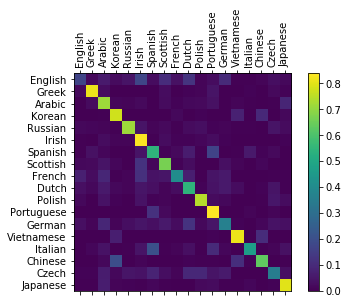

In [7]:
rnn.results()

## GRU Units

### Model Definition

In [0]:
class RNN_GRU(nn.Module):

    def __init__(self, hidden_size, DL=DL):
        super(RNN_GRU, self).__init__()
        
        input_size = DL.n_letters
        output_size = DL.n_categories
        
        self.hidden_size = hidden_size

        self.ih2h = nn.GRU(input_size, hidden_size, batch_first=True)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.output_size = output_size
        self.input_size = input_size
        
        self.learning_rate = 0.005
        self.criterion = nn.NLLLoss()
        self.DL = DL

    def forward(self, input, hidden):
        input = input.view(1,1,self.input_size)
        hidden = hidden.view(1,1,self.hidden_size)
        output, hidden = self.ih2h(input, hidden)
        output = output.view(1, self.hidden_size)
        output = self.h2o(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
   
    def timeSince(self, since):
        now = time.time()
        s = now - since
        m = math.floor(s / 60)
        s -= m * 60
        return '%dm %ds' % (m, s)

    # Just return an output given a line
    def evaluate(self, line_tensor):
        hidden = self.initHidden()
        for i in range(line_tensor.size()[0]):
            output, hidden = self(line_tensor[i], hidden)
        return output
    
    def train_single(self, category_tensor, line_tensor):
        hidden = self.initHidden()

        self.zero_grad()

        for i in range(line_tensor.size()[0]):
            output, hidden = self(line_tensor[i], hidden)

        loss = self.criterion(output, category_tensor)
        loss.backward()

        # Add parameters' gradients to their values, multiplied by learning rate
        for p in self.parameters():
            p.data.add_(-self.learning_rate, p.grad.data)

        return output, loss.item()
        
    def train(self):
        
        n_iters = 100000
        print_every = 5000
        plot_every = 1000

        # Keep track of losses for plotting
        current_loss = 0
        all_losses = []
        all_test_losses = []

        start = time.time()

        for iter in range(1, n_iters + 1):
            category, line, category_tensor, line_tensor = self.DL.randomTrainingExample()
            output, loss = self.train_single(category_tensor, line_tensor)
            current_loss += loss

            # Print iter number, loss, name and guess
            if iter % print_every == 0:
                guess, guess_i = self.DL.categoryFromOutput(output)
                correct = '✓' if guess == category else '✗ (%s)' % category
                print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, self.timeSince(start), loss, line, guess, correct))

            # Add current loss avg to list of losses
            if iter % plot_every == 0:
                all_losses.append(current_loss / plot_every)
                current_loss = 0

            # Compute loss based on test data
            if iter % plot_every == 0:
                test_loss = 0
                n_test_instances = 0
                for category in self.DL.all_categories:
                    category_tensor = Variable(torch.LongTensor([self.DL.all_categories.index(category)]))
                    n_test_instances = n_test_instances + len(self.DL.test_data[category])
                    for line in self.DL.test_data[category]:
                        line_tensor = Variable(self.DL.lineToTensor(line))
                        output = self.evaluate(line_tensor)
                        test_loss = test_loss + self.criterion(output, category_tensor)
                all_test_losses.append(test_loss.item() / n_test_instances)

        return all_test_losses
    
    def results(self):
        # Keep track of correct guesses in a confusion matrix
        confusion = torch.zeros(self.DL.n_categories, self.DL.n_categories)
        n_confusion = 10000

        # Go through a bunch of examples and record which are correctly guessed
        for i in range(n_confusion):
            category, line, category_tensor, line_tensor = DL.randomTrainingExample()
            output = self.evaluate(line_tensor)
            guess, guess_i = self.DL.categoryFromOutput(output)
            category_i = self.DL.all_categories.index(category)
            confusion[category_i][guess_i] += 1

        # Normalize by dividing every row by its sum
        for i in range(self.DL.n_categories):
            confusion[i] = confusion[i] / confusion[i].sum()

        # Set up plot
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(confusion.numpy())
        fig.colorbar(cax)

        # Set up axes
        ax.set_xticklabels([''] + self.DL.all_categories, rotation=90)
        ax.set_yticklabels([''] + self.DL.all_categories)

        # Force label at every tick
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

        # sphinx_gallery_thumbnail_number = 2
        plt.show()
        
N_HIDDEN = 128
rnn_gru = RNN_GRU(N_HIDDEN)

### Model Training

In [31]:
gru_test_losses = rnn_gru.train()

5000 5% (0m 41s) 2.9618 Forsythe / French ✗ (English)
10000 10% (1m 29s) 2.9009 Botros / Greek ✗ (Arabic)
15000 15% (2m 17s) 2.2637 Heel / Dutch ✓
20000 20% (3m 5s) 2.8099 Meadhra / Japanese ✗ (Irish)
25000 25% (3m 52s) 1.7218 Falco / Italian ✓
30000 30% (4m 39s) 0.9727 Shi / Chinese ✓
35000 35% (5m 27s) 0.8531 Pefanis / Greek ✓
40000 40% (6m 14s) 1.5187 An / Korean ✗ (Vietnamese)
45000 45% (7m 1s) 2.8268 Giersig / Scottish ✗ (Czech)
50000 50% (7m 48s) 2.0756 Macclelland / Scottish ✗ (Irish)
55000 55% (8m 36s) 0.0182 Mikhalychev / Russian ✓
60000 60% (9m 23s) 2.0115 Colman / Scottish ✗ (Irish)
65000 65% (10m 10s) 2.9866 Schmied / German ✗ (Czech)
70000 70% (10m 57s) 0.6512 Faure / French ✓
75000 75% (11m 44s) 2.4365 Wallace / French ✗ (Scottish)
80000 80% (12m 31s) 1.8031 Sierzant / Dutch ✗ (Polish)
85000 85% (13m 18s) 1.0318 Houtem / Dutch ✓
90000 90% (14m 5s) 0.4173 Sebastino / Italian ✓
95000 95% (14m 52s) 2.4977 Arce / French ✗ (Spanish)
100000 100% (15m 40s) 0.7384 Murray / Scotti

### Evaluating Results

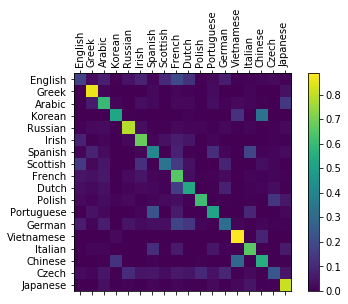

In [10]:
rnn_gru.results()

## LSTM Units

### Model Definition

In [0]:
class RNN_LSTM(nn.Module):

    def __init__(self, hidden_size, DL=DL):
        super(RNN_LSTM, self).__init__()
        
        input_size = DL.n_letters
        output_size = DL.n_categories
        
        self.hidden_size = hidden_size

        self.ih2h = nn.LSTM(input_size, hidden_size, 1, batch_first=True)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.output_size = output_size
        self.input_size = input_size
        self.batch_size = 1
        self.lstm_layers = 1
        
        self.learning_rate = 0.005
        self.criterion = nn.NLLLoss()
        self.DL = DL

    def forward(self, input, hidden):
        input = input.view(1,1,self.input_size)
        output, hidden = self.ih2h(input, hidden)
        output = output.view(1, self.hidden_size)
        output = self.h2o(output)
        output = self.softmax(output)
        return output, hidden
    
    
    def initHidden(self):
        return (torch.zeros(self.lstm_layers, self.batch_size, self.hidden_size),
                torch.zeros(self.lstm_layers, self.batch_size, self.hidden_size))
    
#     def initHidden(self):
#         return torch.zeros(1, self.hidden_size)
   
    def timeSince(self, since):
        now = time.time()
        s = now - since
        m = math.floor(s / 60)
        s -= m * 60
        return '%dm %ds' % (m, s)

    # Just return an output given a line
    def evaluate(self, line_tensor):
        hidden = self.initHidden()
        for i in range(line_tensor.size()[0]):
            output, hidden = self(line_tensor[i], hidden)
        return output
    
    def train_single(self, category_tensor, line_tensor):
        hidden = self.initHidden()

        self.zero_grad()

        for i in range(line_tensor.size()[0]):
            output, hidden = self(line_tensor[i], hidden)

        loss = self.criterion(output, category_tensor)
        loss.backward()

        # Add parameters' gradients to their values, multiplied by learning rate
        for p in self.parameters():
            p.data.add_(-self.learning_rate, p.grad.data)

        return output, loss.item()
        
    def train(self):
        
        n_iters = 100000
        print_every = 5000
        plot_every = 1000

        # Keep track of losses for plotting
        current_loss = 0
        all_losses = []
        all_test_losses = []

        start = time.time()

        for iter in range(1, n_iters + 1):
            category, line, category_tensor, line_tensor = self.DL.randomTrainingExample()
            output, loss = self.train_single(category_tensor, line_tensor)
            current_loss += loss

            # Print iter number, loss, name and guess
            if iter % print_every == 0:
                guess, guess_i = self.DL.categoryFromOutput(output)
                correct = '✓' if guess == category else '✗ (%s)' % category
                print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, self.timeSince(start), loss, line, guess, correct))

            # Add current loss avg to list of losses
            if iter % plot_every == 0:
                all_losses.append(current_loss / plot_every)
                current_loss = 0

            # Compute loss based on test data
            if iter % plot_every == 0:
                test_loss = 0
                n_test_instances = 0
                for category in self.DL.all_categories:
                    category_tensor = Variable(torch.LongTensor([self.DL.all_categories.index(category)]))
                    n_test_instances = n_test_instances + len(self.DL.test_data[category])
                    for line in self.DL.test_data[category]:
                        line_tensor = Variable(self.DL.lineToTensor(line))
                        output = self.evaluate(line_tensor)
                        test_loss = test_loss + self.criterion(output, category_tensor)
                all_test_losses.append(test_loss.item() / n_test_instances)

        return all_test_losses
    
    def results(self):
        # Keep track of correct guesses in a confusion matrix
        confusion = torch.zeros(self.DL.n_categories, self.DL.n_categories)
        n_confusion = 10000

        # Go through a bunch of examples and record which are correctly guessed
        for i in range(n_confusion):
            category, line, category_tensor, line_tensor = DL.randomTrainingExample()
            output = self.evaluate(line_tensor)
            guess, guess_i = self.DL.categoryFromOutput(output)
            category_i = self.DL.all_categories.index(category)
            confusion[category_i][guess_i] += 1

        # Normalize by dividing every row by its sum
        for i in range(self.DL.n_categories):
            confusion[i] = confusion[i] / confusion[i].sum()

        # Set up plot
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(confusion.numpy())
        fig.colorbar(cax)

        # Set up axes
        ax.set_xticklabels([''] + self.DL.all_categories, rotation=90)
        ax.set_yticklabels([''] + self.DL.all_categories)

        # Force label at every tick
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

        # sphinx_gallery_thumbnail_number = 2
        plt.show()
        
N_HIDDEN = 128
rnn_lstm = RNN_LSTM(N_HIDDEN)

### Model Training

In [33]:
lstm_test_losses = rnn_lstm.train()

5000 5% (0m 43s) 2.8740 Ebner / Scottish ✗ (German)
10000 10% (1m 33s) 2.9420 Siemon / Irish ✗ (German)
15000 15% (2m 23s) 2.7527 Bishara / Arabic ✓
20000 20% (3m 14s) 2.8638 Ghanem / Russian ✗ (Arabic)
25000 25% (4m 4s) 2.9518 Savona / Japanese ✗ (Italian)
30000 30% (4m 54s) 2.4037 Braden / German ✗ (Irish)
35000 35% (5m 44s) 2.4703 Uberti / Scottish ✗ (Italian)
40000 40% (6m 34s) 2.3213 Chicken / Irish ✗ (Czech)
45000 45% (7m 24s) 1.1692 Rim / Korean ✓
50000 50% (8m 14s) 1.6317 Travere / German ✗ (French)
55000 55% (9m 4s) 1.0900 Dam / Vietnamese ✓
60000 60% (9m 54s) 0.4112 Ziemniak / Polish ✓
65000 65% (10m 43s) 1.5563 Vo / Korean ✗ (Vietnamese)
70000 70% (11m 33s) 1.0133 Nikolaou / Greek ✓
75000 75% (12m 23s) 2.0175 Nader / German ✗ (Arabic)
80000 80% (13m 12s) 2.5788 Simoes / Greek ✗ (Portuguese)
85000 85% (14m 2s) 1.2426 Liang / Vietnamese ✗ (Chinese)
90000 90% (14m 52s) 0.4530 Barros / Portuguese ✓
95000 95% (15m 42s) 0.4735 Alvarez / Spanish ✓
100000 100% (16m 32s) 0.5138 Thao 

### Evaluating Results

In [0]:
rnn_lstm.results()

## Comparing Types of Units

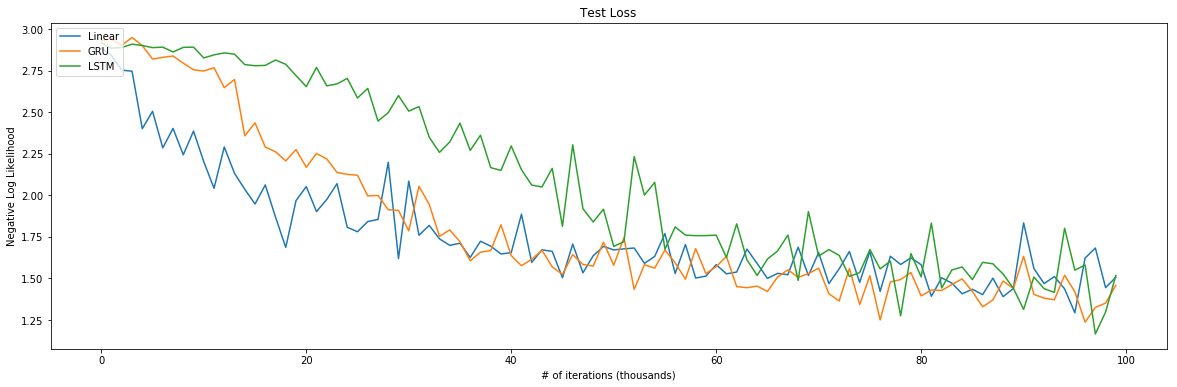

In [34]:
plt.figure(figsize=(20, 6))

plt.plot(lhu_test_losses)
plt.plot(gru_test_losses)
plt.plot(lstm_test_losses)

plt.xlabel('# of iterations (thousands)')
plt.ylabel('Negative Log Likelihood')
plt.title('Test Loss')

plt.legend(['Linear', 'GRU', 'LSTM'], loc='upper left')

plt.show()

# Discussion

All the models converge to a similar loss on the test set. However, the RNN with linear units converges the fastest, followed by the GRU units and then the LSTM units.

The names are usually short so the GRU and LSTM units provide no obvious advantage in terms of capturing long range depedencies. Since there are not many steps in the sequence, the linear units do not suffer from vanishing gradients and are able to capture the name sequence well throughout the hidden state. They are also less parameters to learn for the linear units so it trains faster.

The LSTM units converges slower than the GRU units. The GRU units have access to the entire hidden state at every step while the LSTM uses the output gate to control what parts of the hidden state to allow the next step to access. The LSTM also has to learn when to forget and when to preserve the previous cells inputs. In this way, the LSTM has more parameters and could take longer to converge to the right parameters for capturing the short term dependencies in the names in different languages.